# Crawler Twitter

Utilizamos Selenium y realizamos la busqueda atraves de la etiqueta 
//div[@dir='auto']

//div[@data-testid='reply']

//div[@data-testid='retweet']

//div[@data-testid='like']

In [403]:
from selenium import webdriver

DRIVER_PATH = 'chromedriver.exe'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
driver.get('https://twitter.com/LassoGuillermo')
h1 = driver.find_element_by_class_name('css-1dbjc4n')


Realizamos un scrooll mientras guardamos cada publicacion dentro del list

In [404]:
list_dataset =list()
list_contenido=list()
list_reply=list()
list_retweet=list()
list_like=list()

for i in range(1,50):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    tweet_textos = driver.find_elements_by_xpath("//div[@dir='auto']")
    for aux in range(len(tweet_textos)):
        if(tweet_textos[aux].text == '·'):
            list_contenido.append(tweet_textos[aux+1].text)
    
    tweet_replys = driver.find_elements_by_xpath("//div[@data-testid='reply']")
    for tweet_reply in tweet_replys:
        list_reply.append(tweet_reply.text)

    tweet_retweets = driver.find_elements_by_xpath("//div[@data-testid='retweet']")
    for tweet_retweet in tweet_retweets:
        list_retweet.append(tweet_retweet.text)

    tweet_likes = driver.find_elements_by_xpath("//div[@data-testid='like']")
    for tweet_like in tweet_likes:
       
        list_like.append(tweet_like.text)     
    
    
    time.sleep(3)
    
    print(i)
    
for j in range(len(list_contenido)) :
    list_dataset.append([list_contenido[j],list_reply[j],list_retweet[j],list_like[j]])
    print(list_contenido[j]," likes = ",list_like[j])
    print("*******************************************************************")
print(len(list_dataset))
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Nuestro proyecto de Ley Orgánica de Libre Expresión y Comunicación garantiza un ECUADOR LIBRE.

Estamos comprometidos con el derecho a la libertad de todos los ecuatorianos. 

#GobiernoDelEncuentro
#JuntosLoLogramos  likes =  2 mil
*******************************************************************
Hoy envié a la Asamblea Nacional el proyecto de Ley Orgánica de Libre Expresión y Comunicación. Estamos comprometidos con un ECUADOR LIBRE, donde el derecho a la libertad de expresión esté plenamente garantizado. 

#GobiernoDelEncuentro
#JuntosLoLogramos  likes =  5,1 mil
*******************************************************************
Organización gubernamental de Ecuador  likes =  4,5 mil
*******************************************************************
Hoy tuve la oportunidad de dialogar con 
@leopoldolopez
 y 
@liliantintori
, grandes líderes vene

In [457]:
#print(len(list_contenido))
#print(len(list_reply))

# Limpieza De Datos

Realizamos una limpieza ya que los valores que obtenemos son 1.4mil por lo cual debemos cambiar a un numero que podamos trabajar.
Ejemplo:
1.1mil = 1100

In [548]:
#Creacion De Dataset
import pandas as pd

df = pd.DataFrame()

df['contenido']=list_contenido[0:300]
df['reply']=list_reply[0:300]
df['retweet']=list_retweet[0:300]
df['like']=list_like[0:300]



In [549]:
#Cambio a datos numericos 

numero_cambio=list()
for aux in df['retweet']:
    #print(aux.find(' mil'))
    #print(aux)
    if aux.find('mil')==1 or aux.find('mil')==2 or aux.find('mil')==3 or aux.find('mil')==4 or aux.find('mil')==5 or aux.find('mil')==6:
        #print("valor=")
        aux=aux.replace(',', '.')
        #numero_cambio.append(float(aux.replace(' mil', ''))*1000)
        numero_cambio.append(int(float(aux.replace(' mil', ''))*1000))
        #print(float(aux.replace(' mil', ''))*1000)
    else :
        numero_cambio.append(aux)
        print(aux)
#print(numero_cambio)
df['retweet']=numero_cambio




numero_cambio_reply=list()
for aux in df['reply']:
    #print(aux.find('mil'))
    if aux.find('mil')==2  or aux.find('mil')==4 or aux.find('mil')==6:
        #print("valor=")
        aux=aux.replace(',', '.')
        numero_cambio_reply.append(float(aux.replace(' mil', ''))*1000)
    else :
        numero_cambio_reply.append(aux)   
#print(numero_cambio)
df['reply']=numero_cambio_reply

597
558
880
639
876
781
490
968
292
584
538
620
363
663
709
305
858
514
778
274
525
338
281
259
235
235
285
222
228
207
176
198
300
461
345
677
545
766
639
427
464
317
371
848
865
702
590
959
749
317
873
449
246
253
363
433
207
223
880
265
158
457
417
390
159
54
288
307
737
407
960
250
92
157
26
217
211
125
198
363
218
552
680
51
786
811
636
205
524
814
642
583
110
268
946
228
357
218
265
458
254
134
111
118
477
541
467
175
290
796
109
208
335
695
504
453
362
189
373
623
269
521
542
374
937
514
660
555
426
371
119
276
517
626
844
594
291
325
206
210
501
229
751
381
756
395
139
222
706
573
512
621
764
740
842
607
741
404
837
490
921
607
738
674
797
406
630
441
490
524
209
890
413
657
621
667
364
429
467
964
474
431
987
456
174
345
415
148
498
637
481
303
60
378
490
735
337
361
247
217
420
184
525
456
339
318
309
365
468
345
403
360
336
567
274
279
415
346
561
449
670
389
284
204
310
630
855
364
601
592
571
549
354


Ahora realizamos la creacion del dataset

In [550]:
print(df)
df.to_csv('datos_twitter.csv')

                                             contenido reply retweet     like
0    Nuestro proyecto de Ley Orgánica de Libre Expr...   268     597    2 mil
1    Hoy envié a la Asamblea Nacional el proyecto d...   498    1000  5,1 mil
2                Organización gubernamental de Ecuador   169     558  4,5 mil
3    Hoy tuve la oportunidad de dialogar con \n@leo...   581     880  4,3 mil
4    Fue un honor recibir a representantes de \n@US...   207     639  2,9 mil
..                                                 ...   ...     ...      ...
295  Los subsidios SON PARA LOS POBRES. No son para...    81     571  2,1 mil
296  En 6 días tenemos una responsabilidad históric...   425    2100  5,3 mil
297  Las 4 claves de mi Plan de Gobierno: fortalece...   221     549  1,7 mil
298  ¡Estamos en el Distrito 1 de Guayas con \n@Jua...   175     354  1,2 mil
299  Esta noche \n@soyfdelrincon\n entrevista en Co...   501    1000  3,6 mil

[300 rows x 4 columns]


# Proceso De Regresion Con El Datset

In [551]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [552]:
data = pd.read_csv("datos_twitter.csv")

conteo_palabras = list()
for i in range(len(data['contenido'])):
            texto=data['contenido'][i]
            conteo_palabras.append(len(texto.split()))
print(len(conteo_palabras))              
data['cantidad_palabras']=conteo_palabras

#data['retweet']=numero_cambio
print(data)
data.shape

300
     Unnamed: 0                                          contenido  reply  \
0             0  Nuestro proyecto de Ley Orgánica de Libre Expr...  268.0   
1             1  Hoy envié a la Asamblea Nacional el proyecto d...  498.0   
2             2              Organización gubernamental de Ecuador  169.0   
3             3  Hoy tuve la oportunidad de dialogar con \n@leo...  581.0   
4             4  Fue un honor recibir a representantes de \n@US...  207.0   
..          ...                                                ...    ...   
295         295  Los subsidios SON PARA LOS POBRES. No son para...   81.0   
296         296  En 6 días tenemos una responsabilidad históric...  425.0   
297         297  Las 4 claves de mi Plan de Gobierno: fortalece...  221.0   
298         298  ¡Estamos en el Distrito 1 de Guayas con \n@Jua...  175.0   
299         299  Esta noche \n@soyfdelrincon\n entrevista en Co...  501.0   

     retweet     like  cantidad_palabras  
0        597    2 mil       

(300, 6)

In [553]:
print(type(data['cantidad_palabras'][0]))
print(type(data['retweet'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [555]:
data.describe()

,Unnamed: 0,reply,retweet,cantidad_palabras
count,300.000000,300.000000,300.000000,300.000000
mean,149.500000,287.883333,794.040000,33.000000
std,86.746758,343.170282,1026.883634,10.556109
min,0.000000,12.000000,26.000000,2.000000
25%,74.750000,105.500000,323.250000,28.000000
50%,149.500000,166.000000,525.000000,36.000000
75%,224.250000,361.750000,897.750000,41.000000
max,299.000000,3200.000000,11200.000000,51.000000


# Regresion Lineal

In [556]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["cantidad_palabras"]]
X_train = np.array(dataX)
y_train = filtered_data['retweet'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)


# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Independent term: 
 928.537752011713
Mean squared error: 10915.81
Variance score: 0.70


# Prediccion

In [557]:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 50 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[50]])
print('Con una publicacion de 50 palabras obtendremos un total de compartidos de :',int(y_Dosmil))

Con una publicacion de 50 palabras obtendremos un total de compartidos de : 117


# Regresion Mutivariable 

In [558]:
suma = (filtered_data["reply"])
 
dataX2 =  pd.DataFrame()
dataX2["cantidad_palabras"] = filtered_data["cantidad_palabras"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['retweet'].values

In [559]:

# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-3.68685935  2.67598874]
Mean squared error: 3147.13
Variance score: 0.91


# Prediccion

In [619]:
#Prediccion de una publicacion con 10 comentarios y 50 palabras
z_Dosmil = regr2.predict([[50, 10]])
print("Prediccion con 10 comentarios y 50 palabras tendra una prediccion de retweets = ",int(z_Dosmil))

Prediccion con 10 comentarios y 50 palabras tendra una prediccion de retweets =  221


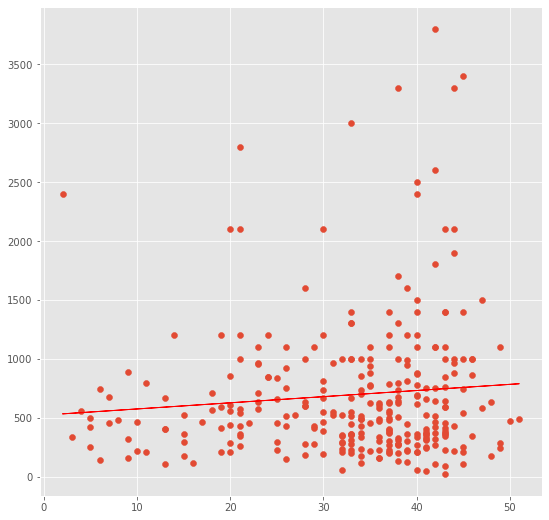

In [620]:
#Graficamos los datos junto con el modelo
plt.figure(figsize=(9,9))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red', linewidth=1)
plt.show()
